Restricted Boltzmann Machine (RBM) - Test 1

In [ ]:
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader

import torchvision.transforms as transforms
import torch


transform = transforms.Compose([transforms.ToTensor()])
train_dataset = FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [2]:
from RBM import RBM

import matplotlib.pyplot as plt
import pandas as pd

epochs = 20

for v_train, _ in train_loader:
    v_initial = v_train

In [3]:
binary_model = RBM(28*28, 500, category='b')

print(f"Initializing RBM's Training")
binary_examples = []
binary_details = []
for ep in range(epochs):
    training_loss = 0
    batches = 0
    for v_train, _ in train_loader:
        loss = binary_model.contrastive_divergence(v_train)
        training_loss += loss
        batches += 1

    v_recon = binary_model.reconstruction(v_initial)

    binary_examples.append({'epoch': ep, 'recon': v_recon.view(-1, 1, 28, 28)})

    binary_details.append({'binary_loss': training_loss/batches})
    print(f'Epoch {ep + 1} - Loss {round(training_loss/batches, 3)}')

binary_examples.append({'epoch': ep + 1, 'recon': torch.bernoulli(v_initial)})

df_binary_details = pd.DataFrame(binary_details)

Initializing RBM's Training
Epoch 1 - Loss 23.204
Epoch 2 - Loss 20.717
Epoch 3 - Loss 19.712
Epoch 4 - Loss 19.067
Epoch 5 - Loss 18.664
Epoch 6 - Loss 18.368
Epoch 7 - Loss 18.171
Epoch 8 - Loss 18.014
Epoch 9 - Loss 17.895
Epoch 10 - Loss 17.805
Epoch 11 - Loss 17.725
Epoch 12 - Loss 17.661
Epoch 13 - Loss 17.617
Epoch 14 - Loss 17.594
Epoch 15 - Loss 17.582
Epoch 16 - Loss 17.581
Epoch 17 - Loss 17.572
Epoch 18 - Loss 17.57
Epoch 19 - Loss 17.565
Epoch 20 - Loss 17.568


In [4]:
prob_model = RBM(28*28, 500, category='p')

print(f"Initializing RBM's Training")
prob_examples = []
prob_details = []
for ep in range(epochs):
    training_loss = 0
    batches = 0
    for v_train, _ in train_loader:
        loss = prob_model.contrastive_divergence(v_train)
        training_loss += loss
        batches += 1

    v_recon = prob_model.reconstruction(v_initial)

    prob_examples.append({'epoch': ep, 'recon': v_recon.view(-1, 1, 28, 28)})

    prob_details.append({'prob_loss': training_loss/batches})
    print(f'Epoch {ep + 1} - Loss {round(training_loss/batches, 3)}')

prob_examples.append({'epoch': ep + 1, 'recon': v_initial})

df_prob_details = pd.DataFrame(prob_details)

Initializing RBM's Training
Epoch 1 - Loss 0.336
Epoch 2 - Loss 0.301
Epoch 3 - Loss 0.289
Epoch 4 - Loss 0.283
Epoch 5 - Loss 0.279
Epoch 6 - Loss 0.276
Epoch 7 - Loss 0.274
Epoch 8 - Loss 0.272
Epoch 9 - Loss 0.271
Epoch 10 - Loss 0.27
Epoch 11 - Loss 0.269
Epoch 12 - Loss 0.268
Epoch 13 - Loss 0.267
Epoch 14 - Loss 0.266
Epoch 15 - Loss 0.266
Epoch 16 - Loss 0.265
Epoch 17 - Loss 0.265
Epoch 18 - Loss 0.264
Epoch 19 - Loss 0.264
Epoch 20 - Loss 0.263


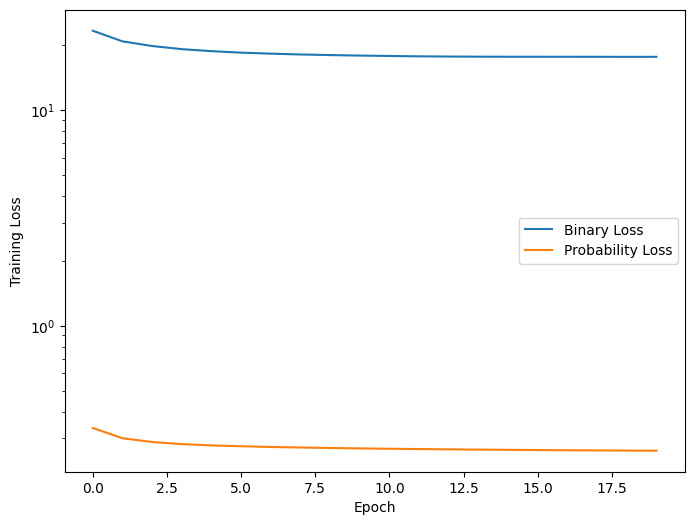

In [8]:
df_comparison = pd.merge(df_binary_details, df_prob_details, left_index=True, right_index=True)

plt.figure(figsize=(8, 6))
plt.semilogy(df_comparison.index, df_comparison['binary_loss'], label='Binary Loss')
plt.semilogy(df_comparison.index, df_comparison['prob_loss'], label='Probability Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

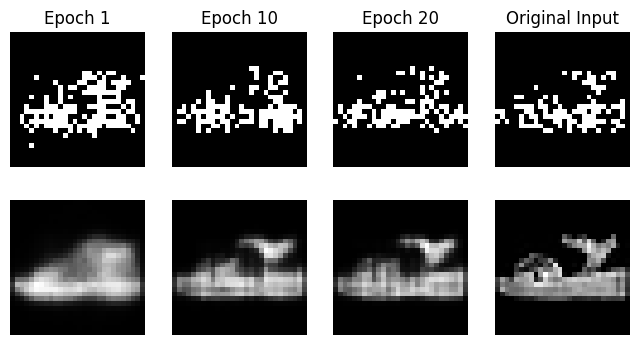

In [14]:
number = 19

fig, axes = plt.subplots(2, 4, figsize=(4 * 2, 4))
for num, epoch in enumerate([0, 9, 19, -1]):
    axes[0, num].imshow(binary_examples[epoch]['recon'][-number].view(28, 28), cmap='gray')

    if epoch == -1: 
        axes[0, num].set_title(f"Original Input")
    else:
        axes[0, num].set_title(f"Epoch {epoch + 1}")
    axes[0, num].axis('off')

    axes[1, num].imshow(prob_examples[epoch]['recon'][-number].view(28, 28), cmap='gray')
    axes[1, num].axis('off')